## OCR AND FACE DETECTION

In [1]:
import cv2
import matplotlib.pyplot as plt

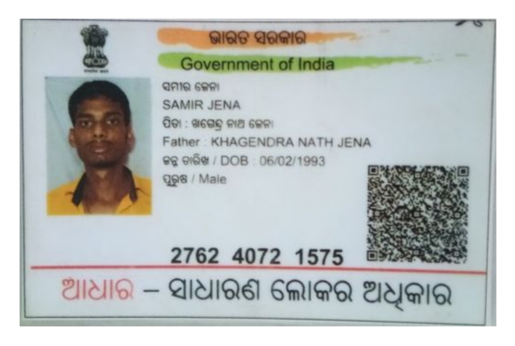

In [2]:
img = cv2.imread("plot.png")

# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [3]:
import easyocr

In [4]:
img_path = 'plot.png'
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)
confidence_threshold =  .80
filtered_text = ""  # Initialize an empty string to store filtered text
for text in result:
    bounding_box, recognized_text, confidence = text
    if confidence > confidence_threshold:
        filtered_text += recognized_text + "|"  # Append filtered text with newline

In [5]:
# filtered_text

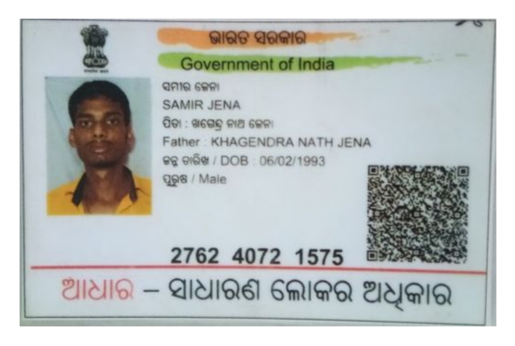

In [6]:
img = cv2.imread("plot.png")

# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [7]:
cascade_path = "/Users/namkha/Desktop/Projects/E-KYC project/models/haarcascade_frontalface_alt.xml"
image_path = "plot.png"
# Read the image
img = cv2.imread(image_path)

# Convert the image to grayscale (Haar cascade works better with grayscale images)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Load the Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cascade_path)

In [8]:
gray_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

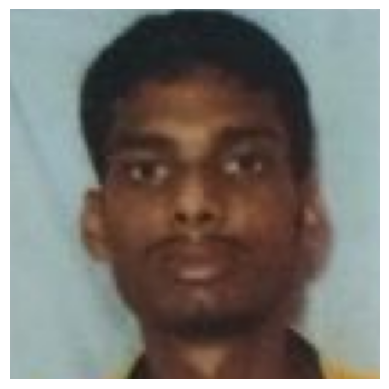

In [10]:
# to find face with largest area
max_area = 0
largest_face = None
for (x,y,w,h) in faces:
    area = w*h
    if area > max_area:
        max_area = area
        largest_face = (x,y,w,h)

# Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
    
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
    
    # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

    # Extract the enlarged face
    extracted_face = rgb_img[new_y:new_y+new_h, new_x:new_x+new_w]

plt.imshow(extracted_face)
plt.axis('off')
plt.show()